In [ ]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_algorithms import AmplificationProblem
import numpy as np

import math
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution
from qiskit.quantum_info.operators import Operator



# Create an empty circuit with the specified registers
circuit = QuantumCircuit(4)
circuit.x(0)
circuit.h(0)

circuit.h([1,2,3])
circuit.x([1,2,3])
circuit.mcx([1,2,3], 0)
circuit.x([1,2,3])
circuit.h([1,2,3])
matrix = -np.eye(2**3)
matrix[0,0] = 1
op = Operator(matrix)
circuit.unitary(op, [1,2,3])
circuit.h([1,2,3])

circuit.x([1,2,3])
circuit.mcx([1,2,3], 0)
circuit.x([1,2,3])
circuit.h([1,2,3])
matrix = -np.eye(2**3)
matrix[0,0] = 1
op = Operator(matrix)
circuit.unitary(op, [1,2,3])
circuit.h([1,2,3])

# Create a Quantum Circuit
meas = QuantumCircuit(4, 3)
meas.barrier()
# map the quantum measurement to the classical bits
meas.measure([1,2,3], [0,1,2])
qc = meas.compose(circuit, [0,1,2,3], front=True)
qc.draw("mpl")

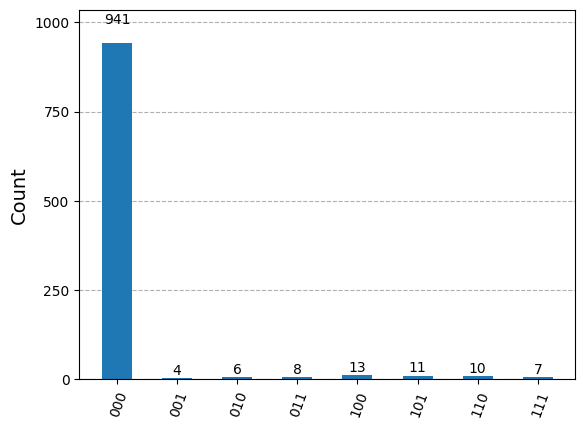

In [30]:
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
backend = AerSimulator() # Quantum circuit simulator backend
# Circuit transpilation to QASM instructions supported by the backend
qc_compiled = transpile(qc, backend)

# Execute the compiled circuit on the qasm simulator.
shots = 1000
job_sim = backend.run(qc_compiled, shots=shots)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

plot_histogram(counts)